# Setting up

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


Make sure you made a shortcut of the folder in your drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ECE 143 Group 18 Project/NASA_planetary_data.csv', skiprows=168)

In [ ]:
df.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,...,sy_tmag,sy_tmag_reflink,sy_kepmag,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,2,1,...,3.83790,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1,2,0,0,0
1,2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,3.82294,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
2,3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,4.32140,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,1,0,0,0
3,4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,2,...,5.86310,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,4,1,0,0
4,5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,3,1,...,5.62810,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,6.095,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1,4,3,0,0


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my application")
location = geolocator.geocode("Xinglong Station")
print(location.address)
print((location.latitude, location.longitude))

兴隆, G321;S438, 叙永县, 泸州市, 四川省, 646400, 中国
(28.2993048, 105.3761434)


In [ ]:
df_mod = df[df.disc_locale == 'Ground']
df_mod = df_mod[df_mod.disc_facility != None]
df_mod = df_mod[df_mod.disc_facility != 'Multiple Observatories']
df_mod = df_mod[df_mod.disc_facility != 'Multiple Facilities']

KeyboardInterrupt: ignored

# example code of planet discovery map

In [ ]:
import plotly.express as px
import pandas as pd
from geopy.geocoders import Nominatim

def get_coordinates(location_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(location_name)

    if location:
        return location.latitude, location.longitude
    else:
        return None

# Example dataset (replace with your actual dataset)
data = {
    'Planet': ['Earth', 'Mars', 'Venus'],
    'Discovery Facility': ['Yunnan Astronomical Observatory', 'Xinglong Station', 'Okayama Astrophysical Observatory'],
    'Discovery Locale': ['Ground', 'Ground', 'Ground'],
}

df = df_mod
df = df.rename({'disc_facility': 'Discovery Facility', 'disc_locale' : 'Discovery Locale'}, axis='columns')

# Filter the dataset for facilities on the ground
ground_facilities = df[df['Discovery Locale'] == 'Ground'].copy()



# Create a new DataFrame to store coordinates
coordinates_df = pd.DataFrame(ground_facilities['Discovery Facility'].apply(get_coordinates).tolist(), columns=['Latitude', 'Longitude'])

# Merge the coordinates DataFrame with the ground facilities DataFrame
ground_facilities = pd.concat([ground_facilities, coordinates_df], axis=1)

# Check for missing coordinates and print the names of facilities with missing coordinates
missing_coordinates = ground_facilities[ground_facilities['Latitude'].isnull() | ground_facilities['Longitude'].isnull()]
if not missing_coordinates.empty:
    print(f"Warning: Coordinates not found for the following facilities:\n{missing_coordinates['Discovery Facility'].tolist()}")

# Remove rows with missing coordinates
ground_facilities = ground_facilities.dropna(subset=['Latitude', 'Longitude'])

# Plot the scatter map using Plotly Express
fig = px.scatter_geo(
    ground_facilities,
    lat='Latitude',
    lon='Longitude',
    title='Discovery Facilities on the Ground',
    projection='natural earth',
)

# Show the plot
fig.show()

KeyboardInterrupt: ignored

In [ ]:
# Plot the scatter map with hover text using Plotly Express
fig = px.scatter_geo(
    ground_facilities,
    lat='Latitude',
    lon='Longitude',
    hover_name='Discovery Facility',  # Specify the column for hover text
    title='Discovery Facilities on the Ground',
    projection='natural earth',
)

In [ ]:
import folium

# Sample data (replace this with your own dataset)
planet_data = [
    {"planet_name": "Kepler-186f", "institution": "NASA Ames Research Center", "latitude": 37.4141, "longitude": -122.0746},
    {"planet_name": "51 Pegasi b", "institution": "European Southern Observatory", "latitude": -29.2585, "longitude": -70.7401},
    {"planet_name": "HD 209458 b", "institution": "NASA Ames Research Center", "latitude": 37.4141, "longitude": -122.0746},
    {"planet_name": "Trappist-1e", "institution": "Belgian Institute for Space Aeronomy", "latitude": 50.8503, "longitude": 4.3517},
    {"planet_name": "WASP-121b", "institution": "University of Cambridge", "latitude": 52.2053, "longitude": 0.1218},
    # Add more data as needed
]

# Create a dictionary to store the number of planets discovered by each institution
planet_counts = {}
for planet in planet_data:
    institution = planet["institution"]
    planet_counts[institution] = planet_counts.get(institution, 0) + 1

# Create a folium map centered on a location (you can adjust the location and zoom level)
map_center = [0, 0]
planet_map = folium.Map(location=map_center, zoom_start=2)

# Define a color scale for marker colors based on the number of planets discovered
color_scale = folium.LinearColormap(['green', 'yellow', 'orange', 'red'], vmin=0, vmax=max(planet_counts.values()))

# Add markers for each planet discovery
for planet in planet_data:
    institution = planet["institution"]
    count = planet_counts.get(institution, 0)

    # Adjust marker size based on the number of planets discovered
    marker_size = count * 5  # You can adjust the multiplier for better visualization

    folium.CircleMarker(
        location=[planet["latitude"], planet["longitude"]],
        radius=marker_size,
        popup=f"{planet['planet_name']} - {institution} ({count} planets)",
        fill=True,
        color=color_scale(count),
        fill_color=color_scale(count),
        fill_opacity=0.7
    ).add_to(planet_map)

# Add the color scale to the map
planet_map.add_child(color_scale)

# Save the map to an HTML file or display it in a Jupyter notebook
planet_map.save("planet_discoveries_map_with_sizes.html")

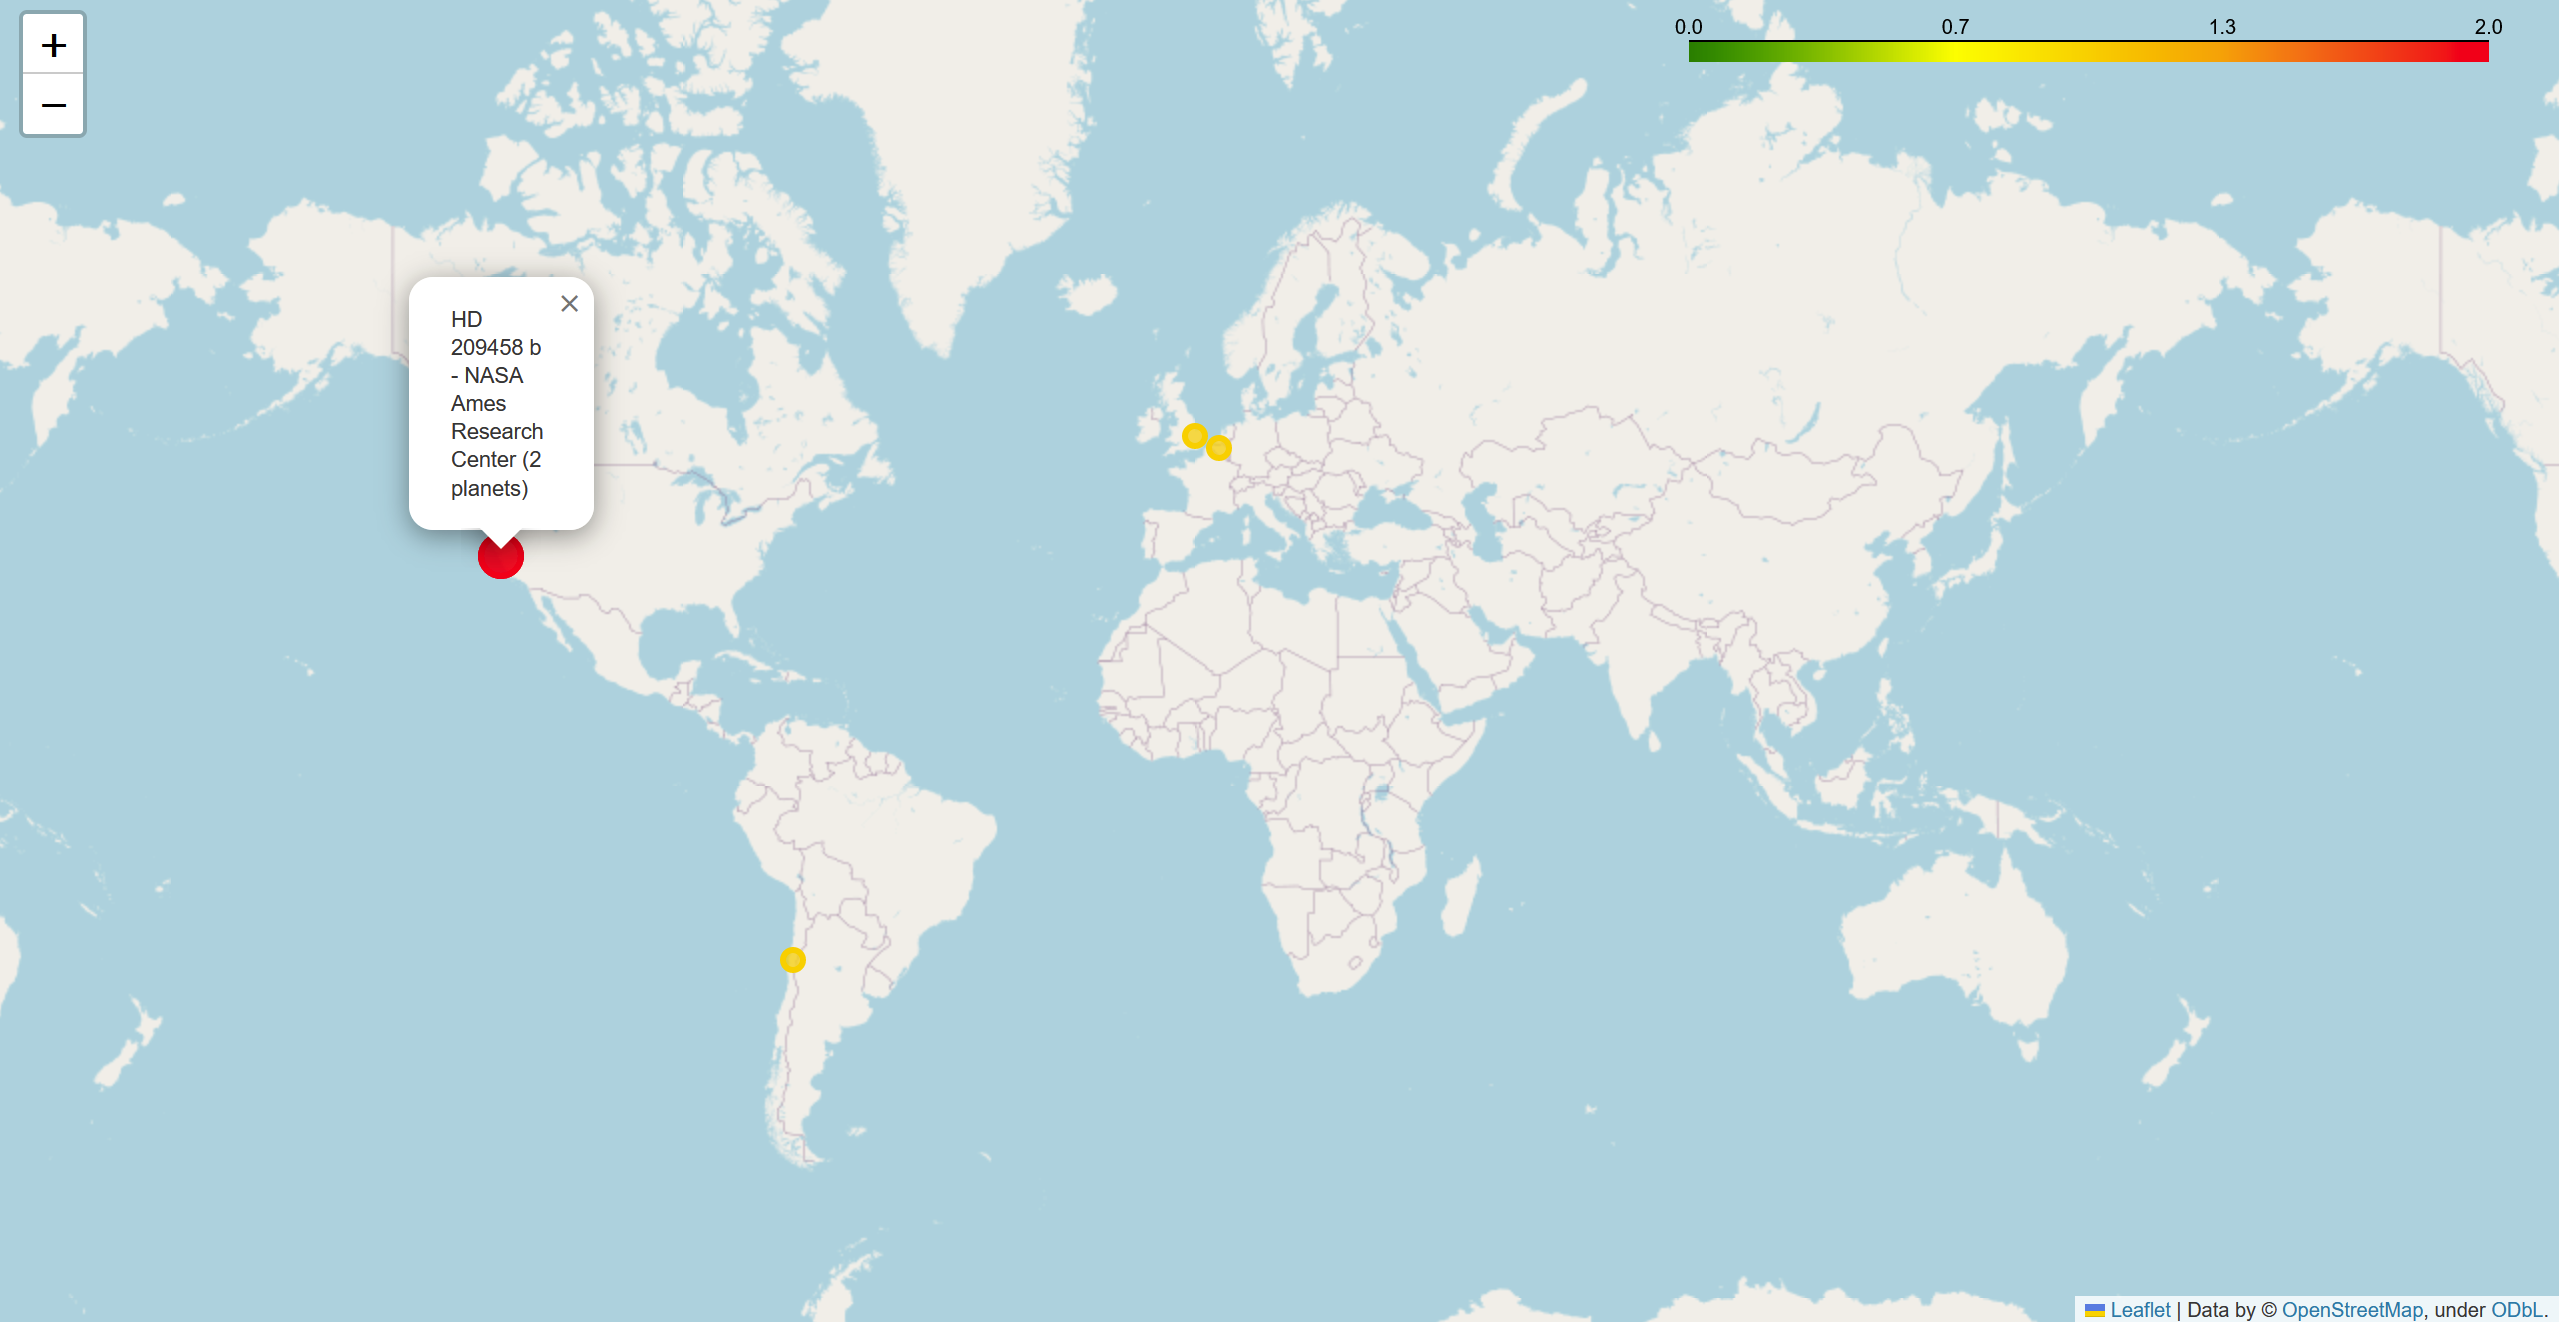

# Planet Location Viz

In [ ]:
df_loc = df[['pl_name','disc_year', 'ra', 'dec', 'sy_dist', 'discoverymethod']].copy()

In [ ]:
df_loc['x'], df_loc['y'], df_loc['z'] = df_loc['sy_dist'] * np.cos(df_loc['ra']) * np.cos(df_loc['dec']), df_loc['sy_dist'] * np.sin(df_loc['ra']) * np.cos(df_loc['dec']), df_loc['sy_dist'] * np.sin(df_loc['dec'])

In [ ]:
df_loc_mod = df_loc[df_loc['sy_dist'] < 1000]
df_loc_mod = pd.concat([pd.DataFrame([['earth', 0, 0, 0, 0, 0, 0, 0, 0]], columns=df_loc_mod.columns), df_loc_mod], ignore_index=True)

In [ ]:
column_list = list(df_loc_mod.columns) + ['cum_year']

data = []

for i in range(1992, 2024):
  tmp = df_loc_mod[df_loc_mod['disc_year']<= i].copy()
  tmp['cum_year'] = i
  data += tmp.values.tolist()

df_new = pd.DataFrame(data, columns = column_list)

In [ ]:
n_colors = 2024-1992
colors = px.colors.sample_colorscale("sunset", [n/(n_colors -1) for n in range(n_colors)])
color_map = { str(i+1992) : x for i,x in enumerate(colors)} | { str(0) : 'blue'}

In [ ]:
df_new['disc_year'] = df_new["disc_year"].astype(str)

In [ ]:
df_new = pd.concat([pd.DataFrame([['x'+str(i), str(i), 0, 0, 0, 2000, 0, 0, 1992, str(1992)] for i in range(1992, 2024)], columns=df_new.columns), df_new], ignore_index=True)

In [ ]:
fig = px.scatter_3d(df_new, x='x', y='y', z='z', color='disc_year', hover_name='pl_name', hover_data = {k : k in ['x', 'y', 'z'] for k in df_new.columns}, animation_frame= 'cum_year',color_discrete_map=color_map, range_x=[-1000, 1000], range_y = [-1000, 1000], range_z = [-1000, 1000], labels={'disc_year':'Discovery Year', 'cum_year':'Planets Discovered Till'}, template = 'plotly_dark')
fig.update_scenes(aspectmode='cube')
fig.show()

# Planet Distance Graph

In [ ]:
def calc_radii_lst(max_dist = 1500, vol = 20000000, start = 0):
  '''Calculate the list of radii bins '''
  radii_lst = [start]
  r_prev = radii_lst[-1]
  while r_prev < max_dist-1:
    radii_lst.append((vol+r_prev**3)**(1./3.))
    r_prev = radii_lst[-1]
  return radii_lst


In [ ]:
bins1 = calc_radii_lst(start = 400)
counts, bins2 = np.histogram(df_loc.sy_dist, bins=bins1)
bins2 = 0.5 * (bins1[:-1] + bins2[1:])

# specify sensible widths
widths = []
for i, b1 in enumerate(bins1[1:]):
    widths.append((b1-bins2[i])*2)

# plotly figure
fig = go.Figure(go.Bar(
    x=bins2,
    y=counts,
    width=widths)).update_layout(title = 'Histogram of Exoplanets Discovered for Equivolume Bins', xaxis_title = "Distance from Earth (parsec)",  yaxis_title = "Number of Planets", template = 'plotly_dark')

fig.show()

In [ ]:
sorted_index = df_loc['discoverymethod'].value_counts().index
df_loc['index'] = df.index
df_loc = df_loc.set_index('discoverymethod', drop=True).loc[sorted_index].reset_index().set_index('index', drop=True)

In [ ]:
df_loc.head()

,level_0,pl_name,disc_year,ra,dec,sy_dist,x,y,z
index,,,,,,,,,
47,Transit,AU Mic b,2020,311.291137,-31.342450,9.7221,-9.335580,-2.618549,0.713704
48,Transit,AU Mic c,2021,311.291137,-31.342450,9.7221,-9.335580,-2.618549,0.713704
56,Transit,BD+20 594 b,2016,53.651123,20.599021,179.4610,30.948583,7.706550,176.604204
83,Transit,CoRoT-1 b,2008,102.079859,-3.102139,787.9090,-17.242087,-787.107039,-31.077510
84,Transit,CoRoT-10 b,2010,291.063681,0.746014,338.3860,-111.740006,221.972306,229.668351


In [ ]:
fig = px.scatter(df_loc, y = 'sy_dist', x='disc_year', color='level_0', labels={
                     "sy_dist": "Distance from Earth (parsec)",
                     "disc_year": "Discovered Year",
                     "level_0": "Method of Discovery"
                 }, template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.histogram(df_loc, x='disc_year', cumulative=True, color = 'level_0', labels={
                     "disc_year": "Discovered Year",
                     "level_0": "Method of Discovery"
                 }, template = 'plotly_dark').update_layout(yaxis_title = "Number of Planets")
fig.show()

# Facility & Locate

In [ ]:
df.columns.tolist()[:21]

['rowid',
 'pl_name',
 'hostname',
 'pl_letter',
 'hd_name',
 'hip_name',
 'tic_id',
 'gaia_id',
 'sy_snum',
 'sy_pnum',
 'sy_mnum',
 'cb_flag',
 'discoverymethod',
 'disc_year',
 'disc_refname',
 'disc_pubdate',
 'disc_locale',
 'disc_facility',
 'disc_telescope',
 'disc_instrument',
 'rv_flag']

In [ ]:
df_new = df[['pl_name',
 'discoverymethod',
 'disc_year',
 'disc_locale',
 'disc_facility',
 'disc_telescope',
 'disc_instrument']].copy()

In [ ]:
df_new.head()

,pl_name,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument
0,11 Com b,Radial Velocity,2007,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph
1,11 UMi b,Radial Velocity,2009,Ground,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph
2,14 And b,Radial Velocity,2008,Ground,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph
3,14 Her b,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer
4,16 Cyg B b,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments


In [ ]:
df_new['disc_locale'] = df_new['disc_locale'].replace('Multiple Locale', 'Multiple Locales')

## Locale & Facility

In [ ]:
df_mod = df_new['disc_facility'].value_counts()
df_mod_fin = df_new[df_new.disc_facility.isin(list(df_mod[df_mod > 50].index))]

In [ ]:
# Plot count of disc_locale
fig1 = px.bar(df_new['disc_locale'].value_counts().reset_index(), x='index', y='disc_locale',
              labels={'index': 'Discovery Locale', 'disc_locale': 'Count'},
              title='Count of Discovery Locale', template = 'plotly_dark')
# Increase the size of x-axis label
fig1.update_layout(xaxis=dict(tickfont=dict(size=18)))
fig1.show()

df_new['disc_facility'].value_counts()

# Plot count of disc_facility
fig2 = px.bar(df_mod_fin['disc_facility'].value_counts().reset_index(), x='index', y='disc_facility',
              labels={'index': 'Discovery Facility', 'disc_facility': 'Count'},
              title='Count of Discovery Facility with > 50 counts', template = 'plotly_dark')
fig2.show()

In [ ]:
# Create a DataFrame to count the number of different locales for each facility
facility_locale_count = df_new.groupby('disc_facility')['disc_locale'].nunique().reset_index()

# Plot the number of different locales for each facility
fig = px.bar(facility_locale_count, x='disc_facility', y='disc_locale',
             labels={'disc_facility': 'Discovery Facility', 'disc_locale': 'Number of Different Locales'},
             title='Number of Different Locales for Each Facility', template = 'plotly_dark')
fig.show()

In [ ]:
# Create a DataFrame to count occurrences of each locale for each facility
facility_locale_count = df_new.groupby(['disc_facility', 'disc_locale']).size().reset_index(name='count')

# Plot different locales for each facility
fig = px.bar(facility_locale_count, x='disc_facility', y='count', color='disc_locale',
             labels={'disc_facility': 'Discovery Facility', 'count': 'Count'},
             title='Different Locales for Each Facility',
             hover_name='disc_locale', template = 'plotly_dark')
fig.show()

## Year & Locale

In [ ]:
# Create a scatter plot
fig = px.scatter(df_new, x='disc_year', y='disc_locale', color='disc_locale',
                 labels={'disc_year': 'Discovery Year', 'disc_locale': 'Discovery Locale'},
                 title='Relationship between Discovery Year and Locale', template = 'plotly_dark')
fig.update_traces(marker=dict(size=10))  # Adjust the size as needed
# Increase the size of y-axis labels
fig.update_layout(yaxis=dict(tickfont=dict(size=18)))  # Adjust the size as needed

fig.show()

## ('locale', 'facility') X ('discoverymethod', 'disc_telescope', 'disc_instrument')
2 x 3

In [ ]:
# ('disc_locale', 'discoverymethod')

# Count the occurrences of each 'discoverymethod' for each 'disc_locale'
count_data = df_new.groupby(['disc_locale', 'discoverymethod']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(count_data, x='disc_locale', y='count', color='discoverymethod',
             title='Count of Discovery Methods in Each Locale',
             labels={'disc_locale': 'Discovery Locale', 'count': 'Count', 'discoverymethod': 'Discovery Method'}, template = 'plotly_dark')

fig.show()

In [ ]:
# ('disc_locale', 'disc_telescope'):

# Count the occurrences of each ('disc_locale', 'disc_telescope') combination
count_data = df_new.groupby(['disc_locale', 'disc_telescope']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(count_data, x='disc_locale', y='count', color='disc_telescope',
             title='Count of Telescopes in Each Locale',
             labels={'disc_locale': 'Locale', 'count': 'Count', 'disc_telescope': 'Telescope'}, template = 'plotly_dark')

locale_order = ['Ground', 'Space', 'Multiple Locales']
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': locale_order})
fig.show()

In [ ]:
# ('disc_locale', 'disc_instrument'):

# Count the occurrences of each ('disc_locale', 'disc_instrument') combination
count_data = df_new.groupby(['disc_locale', 'disc_instrument']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(count_data, x='disc_locale', y='count', color='disc_instrument',
             title='Count of Instruments in Each Locale',
             labels={'disc_locale': 'Locale', 'count': 'Count', 'disc_instrument': 'Instrument'}, template = 'plotly_dark')
locale_order = ['Ground', 'Space', 'Multiple Locales']
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': locale_order})
fig.show()

In [ ]:
# ('disc_facility', 'discoverymethod'):

# Count the occurrences of each ('disc_facility', 'discoverymethod') combination
count_data = df_new.groupby(['disc_facility', 'discoverymethod']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(count_data, x='disc_facility', y='count', color='discoverymethod',
             title='Count of Discovery Methods in Each Facility',
             labels={'disc_facility': 'Discovery Facility', 'count': 'Count', 'discoverymethod': 'Discovery Method'}, template = 'plotly_dark')
fig.show()

In [ ]:
# ('disc_facility', 'disc_telescope'):

# Count the occurrences of each ('disc_facility', 'disc_telescope') combination
count_data = df_new.groupby(['disc_facility', 'disc_telescope']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(count_data, x='disc_facility', y='count', color='disc_telescope',
             title='Count of Telescopes in Each Facility',
             labels={'disc_facility': 'Facility', 'count': 'Count', 'disc_telescope': 'Telescope'}, template = 'plotly_dark')
fig.show()

In [ ]:
# ('disc_facility', 'disc_instrument'):

# Count the occurrences of each ('disc_facility', 'disc_instrument') combination
count_data = df_new.groupby(['disc_facility', 'disc_instrument']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(count_data, x='disc_facility', y='count', color='disc_instrument',
             title='Count of Instruments in Each Facility',
             labels={'disc_facility': 'Facility', 'count': 'Count', 'disc_instrument': 'Instrument'}, template = 'plotly_dark')
fig.show()